# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Alek Piter Wardoyo
- **Email:** alek.535220088@stu.untar.ac.id
- **ID Dicoding:** alekpw

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan tren penyewaan sepeda antara tahun 2011 dengan 2012 ?
- Bagaimana perbandingan penyewaan sepeda berdasarkan musim ?
- Bagaimana perbandingan penyewaan sepeda berdasarkan cuaca ?
- Bagaimana tren rata - rata penyewaan sepeda dalam sehari ?

## Import Semua Packages/Library yang Digunakan

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [421]:
#Memuat dataset day
day_df = pd.read_csv("Dataset\day.csv")

#Menampilkan 5 baris pertama dari dataset day
day_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\743804952.py:2: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv("Dataset\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [422]:
#Memuat dataset hour
hour_df = pd.read_csv("Dataset\hour.csv")

#Menampilkan 5 baris pertama dari dataset hour
hour_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\241938850.py:2: SyntaxWarning: invalid escape sequence '\h'
  hour_df = pd.read_csv("Dataset\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [423]:
#Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [424]:
#Memeriksa missing value data day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data day_df

In [425]:
#Memeriksa duplikasi data day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada data day_df

In [426]:
#Memeriksa parameter statistik data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [427]:
#Menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [428]:
#Memeriksa missing value data hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data hour_df

In [429]:
#Memeriksa duplikasi data hour_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada data hour_df 

In [430]:
#Memeriksa parameter statistik data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Terdapat kesalahan tipe data untuk kolom dteday
- Mengganti nilai kategorikal dengan label yang lebih mudah dipahami
- Mengonversi skala variabel numerik

In [431]:
#Mengubah tipe data dari object menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [432]:
#Mengganti isi kolom season, yr, mnth, holiday, workingday, weekday, dan weathersit agar mudah dipahami
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.yr.replace((0,1), ('2011','2012'), inplace=True)
hour_df.yr.replace((0,1), ('2011','2012'), inplace=True)

day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), inplace=True)
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), inplace=True)

day_df.holiday.replace((0,1), ('holiday','not holiday'), inplace=True)
hour_df.holiday.replace((0,1), ('holiday','not holiday'), inplace=True)

day_df.workingday.replace((0,1), ('holiday','working_day'), inplace=True)
hour_df.workingday.replace((0,1), ('holiday','working_day'), inplace=True)

day_df.weekday.replace((0,1,2,3,4,5,6), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'), inplace=True)

day_df.weathersit.replace((1,2,3,4), ('clear','cloudy_mist','light_snowrain','heavy_snowrain'), inplace=True)
hour_df.weathersit.replace((1,2,3,4), ('clear','cloudy_mist','light_snowrain','heavy_snowrain'), inplace=True)

C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\293624744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\293624744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [433]:
#Mengkonversi kolom temp, atemp, hum, dan windspeed ke satuan aslinya
day_df["temp"] *= 41
hour_df["temp"] *= 41

day_df["atemp"] *= 50
hour_df["atemp"] *= 50

day_df["hum"] *= 100
hour_df["hum"] *= 100

day_df["windspeed"] *= 67
hour_df["windspeed"] *= 67

In [434]:
# day_df.to_csv("Dashboard/day_clean.csv", index=False)
# hour_df.to_csv("Dashboard/hour_clean.csv", index=False)

Telah dilakukan:
- Penghapusan kolom instant karena tidak ada kaitannya dengan analisis data
- Perubahan tipe data kolom dteday dari object menjadi datetime
- Penggantian nilai kategorikal dengan label yang lebih mudah dipahami
- Konversi skala variabel numerik ke satuan aslinya

## Exploratory Data Analysis (EDA)

### Explore day_df

In [435]:
#Menilai parameter statistik data day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,jan,holiday,saturday,working_day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Explore hour_df

In [436]:
#Menilai parameter statistik data hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,jul,NaN,holiday,saturday,working_day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan tren penyewaan sepeda antara tahun 2011 dengan 2012 ?

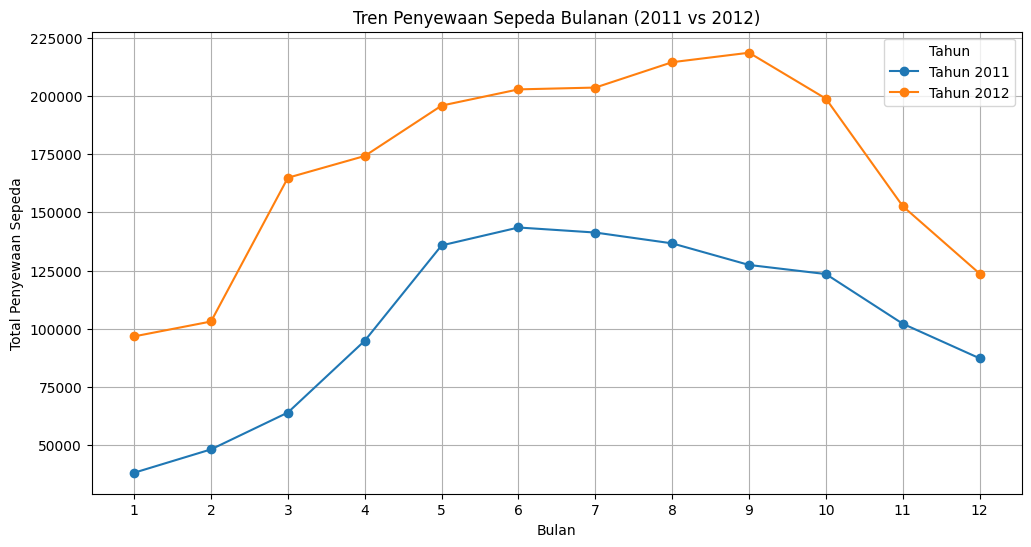

In [437]:
#Mengekstrak tahun dan bulan dari kolom dteday
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

#Menghitung Total Penyewaan Sepeda per Bulan dan Tahun
rental_bulan = day_df.groupby(['year', 'month'])['cnt'].sum().unstack(0)

#Seting ukuran figure
plt.figure(figsize=(12, 6))

# Plot garis untuk masing-masing tahun
for year in rental_bulan.columns:
    plt.plot(rental_bulan.index, rental_bulan[year], marker='o', label=f"Tahun {year}")

#Seting skala sumbu x pada figure
plt.xticks(range(1, 13))

#Menampilkan line plot
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Bulanan (2011 vs 2012)")
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana perbandingan penyewaan sepeda berdasarkan musim ?

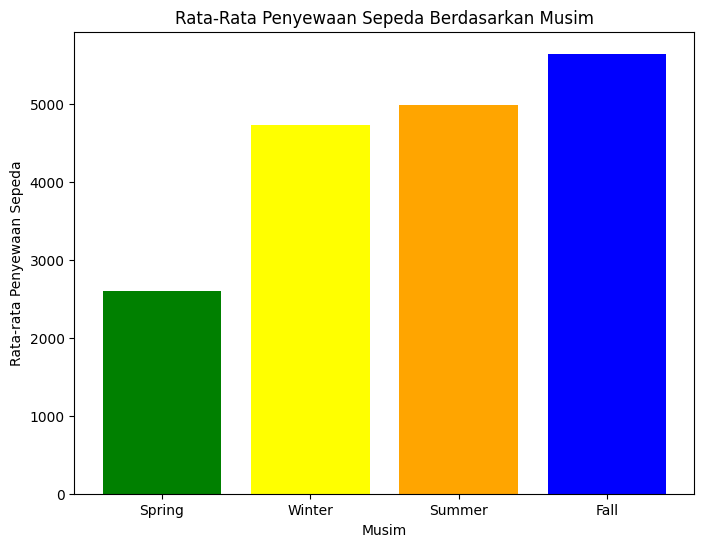

In [438]:
#Mencari rata-rata sewa sepeda berdasarkan musim
rental_musim = day_df.groupby("season")["cnt"].mean().sort_values()

#Seting ukuran figure
plt.figure(figsize=(8, 6))

#Membuat bar chart untuk rata-rata sewa sepeda berdasarkan musim
plt.bar(rental_musim.index, rental_musim.values, color=['green', 'yellow', 'orange', 'blue'])

#Menampilkan bar chart
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-Rata Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda berdasarkan cuaca ?

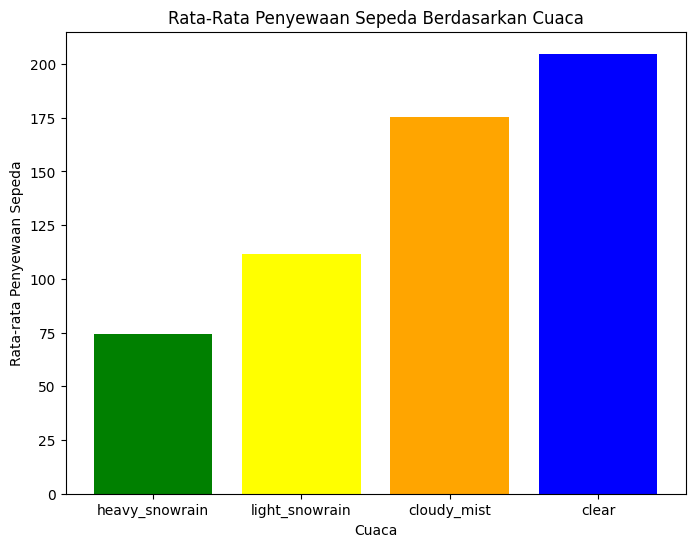

In [439]:
#Mencari rata-rata sewa sepeda berdasarkan cuaca
sepeda_cuaca = hour_df.groupby("weathersit")["cnt"].mean().sort_values()

#Seting ukuran figure
plt.figure(figsize=(8, 6))

#Membuat bar chart untuk rata-rata sewa sepeda berdasarkan cuaca
plt.bar(sepeda_cuaca.index, sepeda_cuaca.values, color=['green', 'yellow', 'orange', 'blue'])

#Menampilkan bar chart
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-Rata Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

### Pertanyaaan 4: Bagaimana tren rata - rata penyewaan sepeda dalam sehari ?

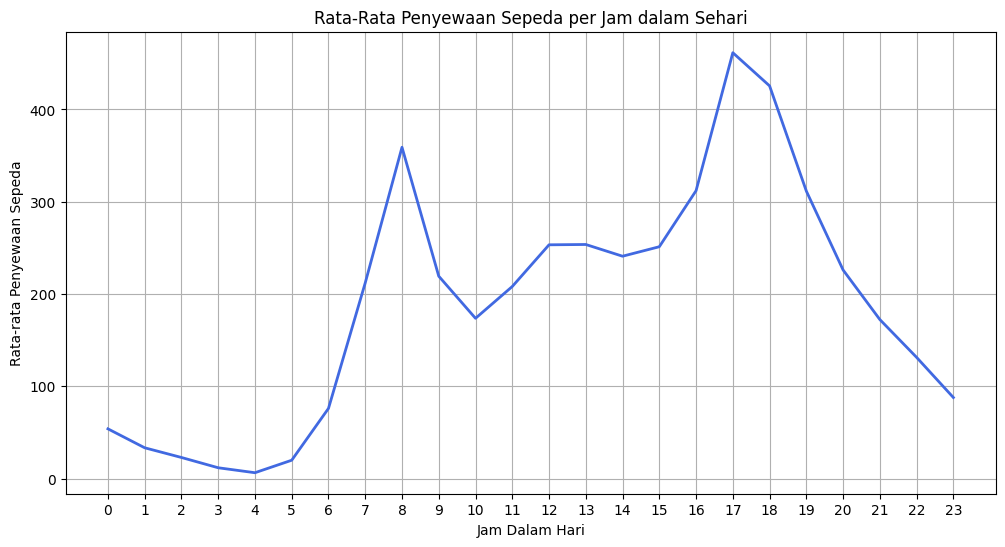

In [440]:
#Mencari rata-rata sewa sepeda per jam
rata_jam = hour_df.groupby("hr")["cnt"].mean()

#Seting ukuran figure
plt.figure(figsize=(12, 6))

#Membuat line plot untuk rata-rata sewa sepeda per jam
plt.plot(rata_jam.index, rata_jam.values, linestyle="-", color="royalblue", linewidth=2)

#Seting skala sumbu x pada figure
plt.xticks(range(0, 24))

#Menampilkan line plot
plt.title("Rata-Rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam Dalam Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(True)
plt.show()


## Analisis Lanjutan

### RFM Analysis

In [441]:
#Mengambil tanggal penyewaan sepeda terakhir
last_date = max(hour_df['dteday'])

rfm = hour_df.groupby(by='registered', as_index=False).agg({
    #Recency
    'dteday': lambda x: (last_date - x.max()).days,
    
    #Frequency
    'instant': 'count',
    
    #Monetary
    'cnt': 'sum'
})

#Seting kolom tabel rfm
rfm.columns = ['registered', 'recency', 'frequency', 'monetary']

rfm.head()

,registered,recency,frequency,monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602


C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\996107461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="registered", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\996107461.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="registered", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\alekp\AppData\Local\Temp\ipykernel_15156\996107461.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

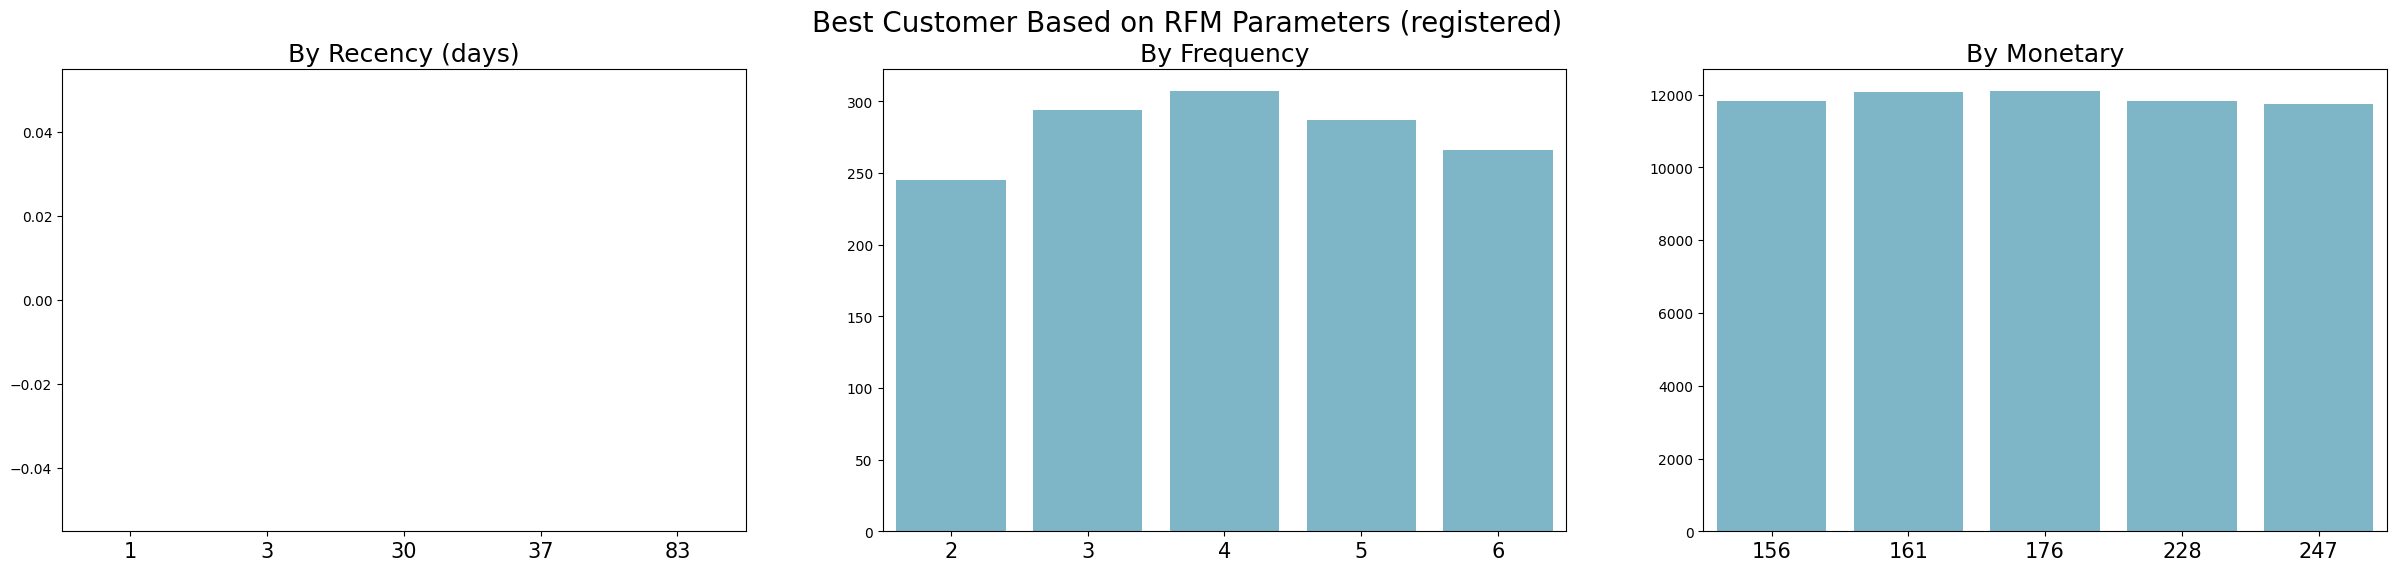

In [442]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="registered", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="registered", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="registered", data=rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (registered)", fontsize=20)
plt.show()
     

## Conclusion

- Kesimpulan pertanyaan 1: Berdasarkan grafik, terlihat bahwa tren jumlah penyewaan tahun 2012 meningkat dibandingkan tahun 2011, dan juga bentuk garis pada grafik menunjukkan bahwa penyewaan sepeda ini memiliki pola tren yang konsisten sepanjang tahun.

- Kesimpulan pertanyaan 2: Berdasarkan grafik, menunjukkan bahwa musim gugur/fall memiliki jumlah penyewaan sepeda tertinggi, lalu musim semi/spring memiliki jumlah penyewaan sepeda terendah. Sedangkan musim dingin/winter dan musim panas/summer memiliki jumlah penyewaan sepeda yang kurang lebih mirip.

- Kesimpulan pertanyaan 3: Berdasarkan grafik, menunjukkan bahwa cuaca cerah/clear mendorong lebih banyak pelanggan untuk menyewa sepeda, kemudian hal ini berbanding lurus menurun dengan cuaca yang buruk. Jadi semakin baik cuaca hari itu, maka semakin banyak juga orang yang menyewa sepeda, begitu sebaliknya. Semakin buruk cuaca hari itu, maka semakin sedikit juga orang yang menyewa sepeda

- Kesimpulan pertanyaan 4: Pada grafik menunjukkan bahwa terjadi dua lonjakan penyewaan sepeda yang terlihat pada jam 8 pagi dan jam 5-6 sore. Kemudian mulai menurun pada jam 7 malam. Hingga pada jam 5 pagi mulai terjadi pembalikan arah menjadi meningkat.